In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('C:/python/UPI_analysis/MyTransaction.csv')

In [3]:
df.head()

,Date,Category,RefNo,Date.1,Withdrawal,Deposit,Balance
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2023,Rent,3.00E+11,1/1/2023,3950.0,0.0,1837.23
2,3/1/2023,Misc,3.00E+11,3/1/2023,105.0,0.0,1732.23
3,3/1/2023,Misc,3.37E+11,3/1/2023,0.0,55.0,1787.23
4,3/1/2023,Food,3.00E+11,3/1/2023,56.0,0.0,1731.23


# Data pre-processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1469 non-null   object 
 1   Category    1469 non-null   object 
 2   RefNo       1469 non-null   object 
 3   Date.1      1469 non-null   object 
 4   Withdrawal  1469 non-null   float64
 5   Deposit     1469 non-null   float64
 6   Balance     1469 non-null   float64
dtypes: float64(3), object(4)
memory usage: 80.5+ KB


In [5]:
df.isna().sum()

Date          1
Category      1
RefNo         1
Date.1        1
Withdrawal    1
Deposit       1
Balance       1
dtype: int64

In [6]:
# only the first row has null values so i am droping it
df.dropna(inplace= True)

In [7]:
df.isna().sum()

Date          0
Category      0
RefNo         0
Date.1        0
Withdrawal    0
Deposit       0
Balance       0
dtype: int64

In [8]:
df.head()

,Date,Category,RefNo,Date.1,Withdrawal,Deposit,Balance
1,1/1/2023,Rent,3.00E+11,1/1/2023,3950.0,0.0,1837.23
2,3/1/2023,Misc,3.00E+11,3/1/2023,105.0,0.0,1732.23
3,3/1/2023,Misc,3.37E+11,3/1/2023,0.0,55.0,1787.23
4,3/1/2023,Food,3.00E+11,3/1/2023,56.0,0.0,1731.23
5,3/1/2023,Misc,3.37E+11,3/1/2023,1.0,0.0,1730.23


In [9]:
# Date and Date.1 seems like duplicated columns let's check it they have same values
sum(df['Date'] == df['Date.1'])

1447

In [10]:
df.shape

(1469, 7)

#### There are 1469 values of which 1447 values are same in both the columns <br>so i am droping one of the columns as it will not add any value to my Analysis <br>, I am droping the RefNO also 

In [11]:
df.drop(columns=['RefNo','Date.1'], inplace= True)

In [12]:
# Renaming the columns for easier use 
df.rename(columns={'Date':'date',
                   'Category':'category',
                   'Withdrawal':'withdrawal',
                   'Deposit':'deposit',
                   'Balance':'balance'
                  }, inplace = True)

In [13]:
df.head()

,date,category,withdrawal,deposit,balance
1,1/1/2023,Rent,3950.0,0.0,1837.23
2,3/1/2023,Misc,105.0,0.0,1732.23
3,3/1/2023,Misc,0.0,55.0,1787.23
4,3/1/2023,Food,56.0,0.0,1731.23
5,3/1/2023,Misc,1.0,0.0,1730.23


In [14]:
df['date'] = pd.to_datetime(df['date'] , format = "mixed",dayfirst=True)

In [15]:
df.head()

,date,category,withdrawal,deposit,balance
1,2023-01-01,Rent,3950.0,0.0,1837.23
2,2023-01-03,Misc,105.0,0.0,1732.23
3,2023-01-03,Misc,0.0,55.0,1787.23
4,2023-01-03,Food,56.0,0.0,1731.23
5,2023-01-03,Misc,1.0,0.0,1730.23


In [16]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [17]:
df.drop(columns=['date'],inplace=True)

In [18]:
df.head()

,category,withdrawal,deposit,balance,year,month,day
1,Rent,3950.0,0.0,1837.23,2023,1,1
2,Misc,105.0,0.0,1732.23,2023,1,3
3,Misc,0.0,55.0,1787.23,2023,1,3
4,Food,56.0,0.0,1731.23,2023,1,3
5,Misc,1.0,0.0,1730.23,2023,1,3


In [19]:
df.duplicated().sum()

5

In [20]:
df.drop_duplicates(inplace= True)

In [21]:
df.shape

(1464, 7)

# EDA

In [22]:
df.head()

,category,withdrawal,deposit,balance,year,month,day
1,Rent,3950.0,0.0,1837.23,2023,1,1
2,Misc,105.0,0.0,1732.23,2023,1,3
3,Misc,0.0,55.0,1787.23,2023,1,3
4,Food,56.0,0.0,1731.23,2023,1,3
5,Misc,1.0,0.0,1730.23,2023,1,3


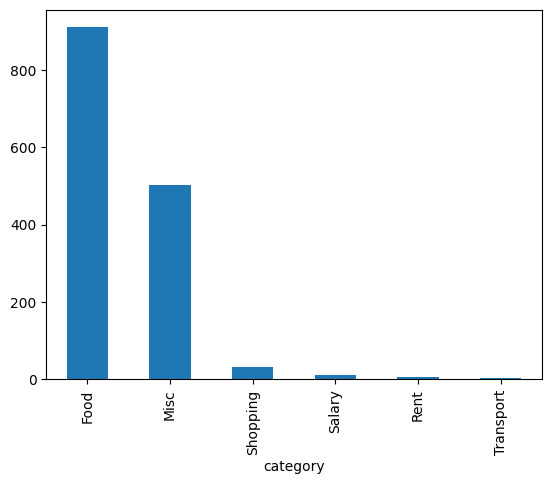

In [23]:
df['category'].value_counts().plot(kind = 'bar')
plt.show()

## Withdrawal vs month

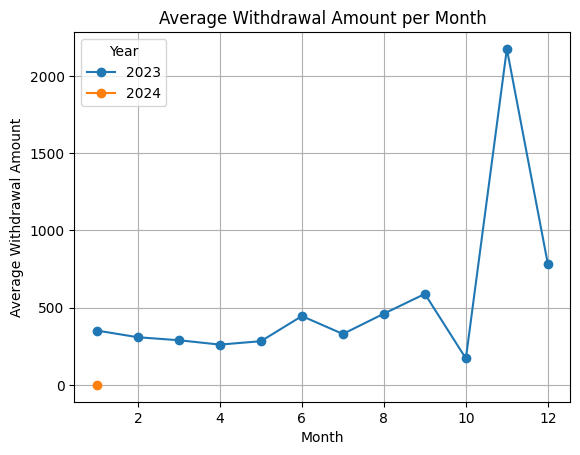

In [35]:
avg_monthly_withdrawal = df.groupby(['year', 'month'])['withdrawal'].mean()

avg_monthly_withdrawal = avg_monthly_withdrawal.unstack(level='year')

avg_monthly_withdrawal.plot(marker='o', linestyle='-')

plt.xlabel('Month')
plt.ylabel('Average Withdrawal Amount')
plt.title('Average Withdrawal Amount per Month')

plt.grid(True)
plt.legend(title='Year')
plt.show()

In [50]:
# it seems like there are very few observations for year 2024
df['year'].value_counts()

year
2023    1463
Name: count, dtype: int64

#### There is only obeservation for year 2024 so it would be better to drop it 

In [51]:
df = df[df['year'] != 2024]

In [52]:
df['year'].value_counts()

year
2023    1463
Name: count, dtype: int64

## withdrawal vs Deposit 

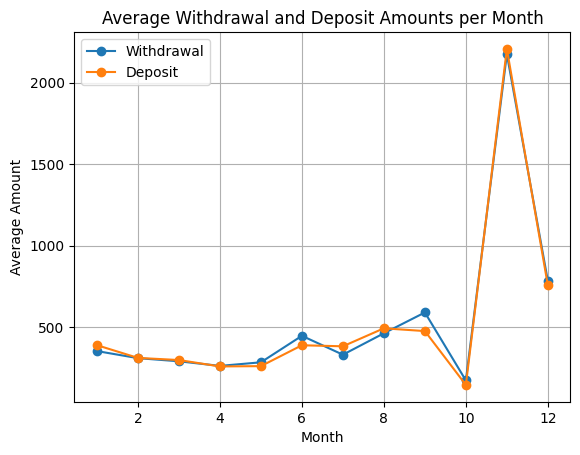

In [55]:
avg_monthly_withdrawal_deposit = df.groupby(['month']).agg({'withdrawal': 'mean', 'deposit': 'mean'})
avg_monthly_withdrawal_deposit = avg_monthly_withdrawal_deposit.reset_index()

plt.plot(avg_monthly_withdrawal_deposit['month'], avg_monthly_withdrawal_deposit['withdrawal'], marker='o', linestyle='-', label='Withdrawal')

plt.plot(avg_monthly_withdrawal_deposit['month'], avg_monthly_withdrawal_deposit['deposit'], marker='o', linestyle='-', label='Deposit')

plt.xlabel('Month')
plt.ylabel('Average Amount')
plt.title('Average Withdrawal and Deposit Amounts per Month')

plt.grid(True) 

plt.legend()

plt.show()

In [56]:
df.head()

,category,withdrawal,deposit,balance,year,month,day
1,Rent,3950.0,0.0,1837.23,2023,1,1
2,Misc,105.0,0.0,1732.23,2023,1,3
3,Misc,0.0,55.0,1787.23,2023,1,3
4,Food,56.0,0.0,1731.23,2023,1,3
5,Misc,1.0,0.0,1730.23,2023,1,3


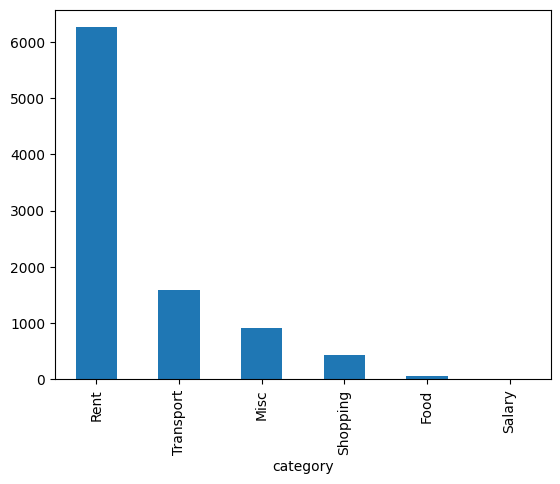

In [59]:
df.groupby('category').withdrawal.mean().sort_values(ascending = False).plot(kind='bar')
plt.show()

#### People withdraw the most for rent followed by Transport and Miscabs

## Describing numerical columns

In [60]:
# deposit 
df['deposit'].describe()

count     1463.000000
mean       386.115687
std       3067.643259
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      34800.000000
Name: deposit, dtype: float64

In [61]:
# withdrawal
df['withdrawal'].describe()

count     1463.000000
mean       390.027204
std       1625.213551
min          0.000000
25%         25.000000
50%         50.000000
75%        138.000000
max      21000.000000
Name: withdrawal, dtype: float64

In [62]:
# balance
df.balance.describe()

count     1463.000000
mean      5543.987102
std       7356.179952
min          0.150000
25%        749.195000
50%       1967.820000
75%       7787.785000
max      36119.740000
Name: balance, dtype: float64

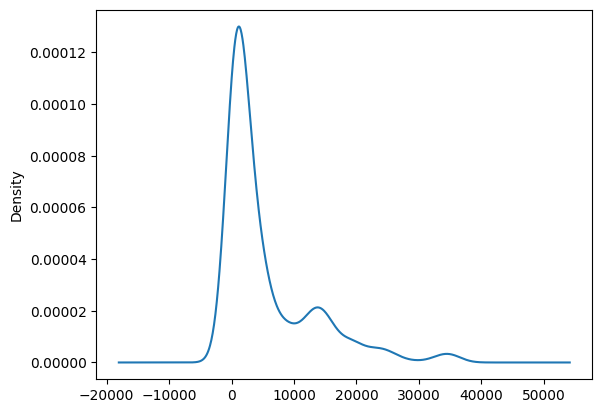

In [74]:
df['balance'].plot(kind = 'kde')
plt.show()

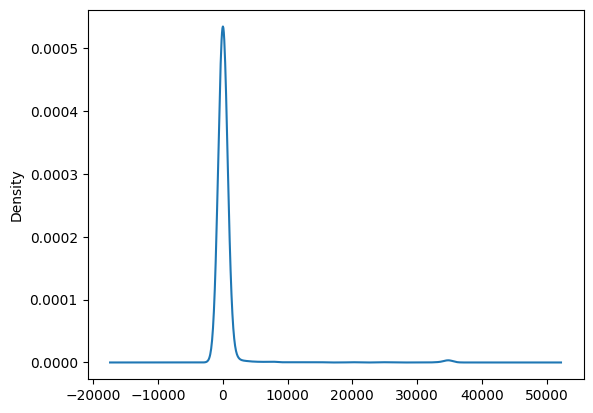

In [73]:
df['deposit'].plot(kind = 'kde')
plt.show()

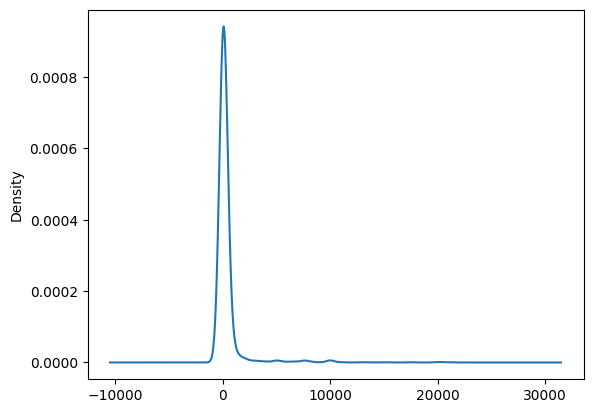

In [72]:
df['withdrawal'].plot(kind = 'kde')
plt.show()

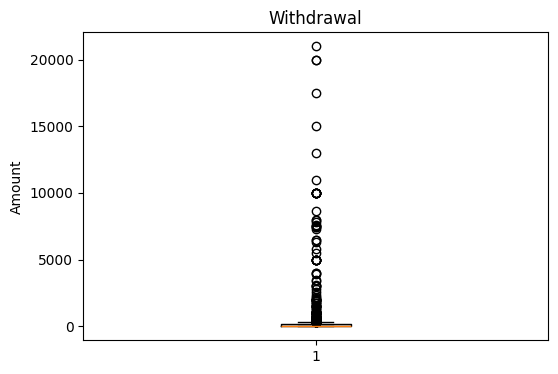

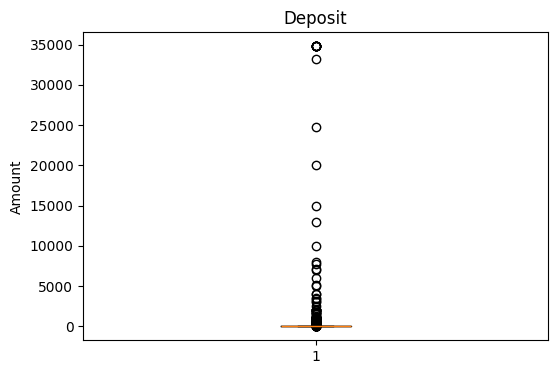

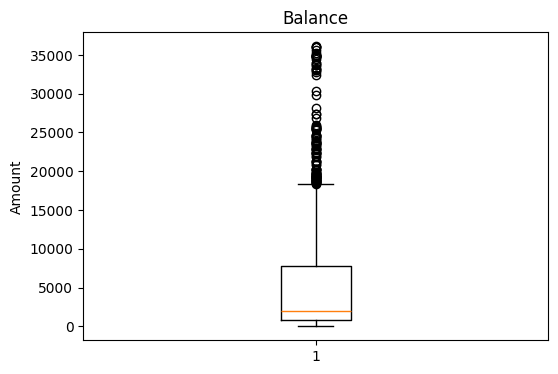

In [76]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['withdrawal'])
plt.title('Withdrawal')
plt.ylabel('Amount')
plt.show()

# Plot box plot for deposit
plt.figure(figsize=(6, 4))
plt.boxplot(df['deposit'])
plt.title('Deposit')
plt.ylabel('Amount')
plt.show()

# Plot box plot for balance
plt.figure(figsize=(6, 4))
plt.boxplot(df['balance'])
plt.title('Balance')
plt.ylabel('Amount')
plt.show()

#### This data is highly imbalanced and also skewed